# 신경망 모델에서 과적합을 막는 방법

## 1. 데이터 양 늘리기
모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로 과적합 현상이 발생할 확률이 늘어납니다. 그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있습니다.

만약, 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 합니다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킵니다. 텍스트 데이터의 경우에는 데이터를 증강하는 방법으로 번역 후 재번역을 통해 새로운 데이터를 만들어내는 역번역(Back Translation) 등의 방법이 있습니다.

## 2. 모델 복잡도 줄이기
인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정됩니다. 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것 입니다.

- 인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 수용력(capacity)이라고 하기도 합니다.

## 3. 가중치 규제(Regularization) 적용하기
복잡한 모델이 간단한 모델보다 과적합될 가능성이 높습니다. 그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말합니다. 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularization)가 있습니다.

L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.  

L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.  
  
  L2 규제는 L1 규제와는 달리 가중치들의 제곱을 최소화하므로 w의 값이 완전히 0이 되기보다는 0에 가까워지기는 경향을 띕니다. L1 규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용합니다. 만약, 이런 판단이 필요없다면 경험적으로는 L2 규제가 더 잘 동작하므로 L2 규제를 더 권장합니다. 인공 신경망에서 L2 규제는 가중치 감쇠(weight decay)라고도 부릅니다.

책에 따라서는 Regularization를 정규화로 번역하기도 하지만, 이는 정규화(Normalization)와 혼동될 수 있으므로 규제 또는 정형화라는 번역이 바람직한 것 같습니다.  


인공 신경망에서 정규화(Normalization)라는 용어가 쓰이는 기법으로는 또 배치 정규화, 층 정규화 등이 있습니다.



## 4. 드롭 아웃
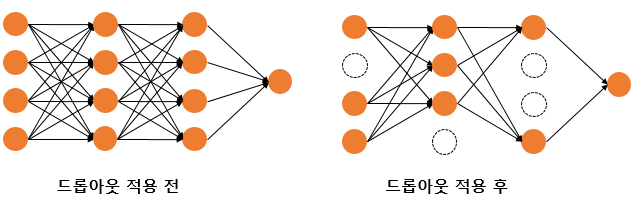 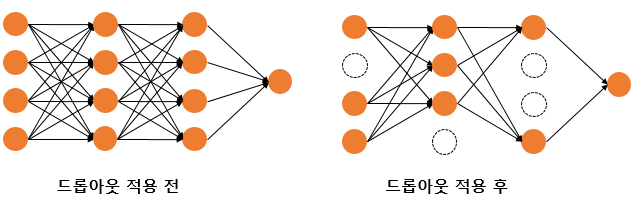  
위의 그림은 드롭아웃 전과 후의 신경망을 비교하고 있습니다. 예를 들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용합니다.

드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적입니다. 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지합니다.

케라스에서는 다음과 같은 방법으로 드롭아웃을 모델에 추가할 수 있습니다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))

2023-01-16 20:10:26.085829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
